# Modal Symbolic Learning: Day 3

## NATOPS: Interpretable gesture recognition

In [1]:
using Pkg
Pkg.activate(".")
Pkg.instantiate()
Pkg.update()
Pkg.status()

  Activating project at `~/Desktop/modal-symbolic-learning-course`
    Updating registry at `~/.julia/registries/General`
    Updating git-repo `https://github.com/JuliaRegistries/General.git`
  No Changes to `~/Desktop/modal-symbolic-learning-course/Project.toml`
  No Changes to `~/Desktop/modal-symbolic-learning-course/Manifest.toml`


Status `~/Desktop/modal-symbolic-learning-course/Project.toml`
  [a93c6f00] DataFrames v1.6.1
  [7806a523] DecisionTree v0.12.4
  [7073ff75] IJulia v1.24.2
⌅ [add582a8] MLJ v0.19.5
  [c6f25543] MLJDecisionTreeInterface v0.4.0
  [e54bda2e] ModalDecisionTrees v0.3.3
  [91a5bcdd] Plots v1.39.0
  [7b3b3b3f] Sole v0.3.1
  [b002da8f] SoleLogics v0.6.11
  [4249d9c7] SoleModels v0.5.3
  [2913bbd2] StatsBase v0.34.2
  [9a3f8284] Random
Info Packages marked with ⌅ have new versions available but compatibility constraints restrict them from upgrading. To see why use `status --outdated`


In [2]:
# Import libraries for statistics & Machine Learning
using Random
using DataFrames
using MLJ
using Plots
using StatsBase

In [3]:
# Import the Sole framework
using Sole

# Load an example time-series classification dataset as a tuple (DataFrame, Vector{String})
X_df, y = Sole.load_arff_dataset("NATOPS");

In [4]:
countmap(y)

Dict{CategoricalArrays.CategoricalValue{String, UInt32}, Int64} with 6 entries:
  "Spread wings"   => 60
  "I have command" => 60
  "Not clear"      => 60
  "Lock wings"     => 60
  "All clear"      => 60
  "Fold wings"     => 60

In [5]:
X_df

Row,X[Hand tip l],Y[Hand tip l],Z[Hand tip l],X[Hand tip r],Y[Hand tip r],Z[Hand tip r],X[Elbow l],Y[Elbow l],Z[Elbow l],X[Elbow r],Y[Elbow r],Z[Elbow r],X[Wrist l],Y[Wrist l],Z[Wrist l],X[Wrist r],Y[Wrist r],Z[Wrist r],X[Thumb l],Y[Thumb l],Z[Thumb l],X[Thumb r],Y[Thumb r],Z[Thumb r]
,Array…,Array…,Array…,Array…,Array…,Array…,Array…,Array…,Array…,Array…,Array…,Array…,Array…,Array…,Array…,Array…,Array…,Array…,Array…,Array…,Array…,Array…,Array…,Array…
1,"[-0.519771, -0.52758, -0.531415, -0.517159, -0.510312, -0.518154, -0.50362, -0.485176, -0.466677, -0.444535 … -0.45501, -0.458937, -0.465048, -0.471251, -0.470015, -0.464627, -0.462666, -0.460253, -0.459572, -0.456737]","[-2.14011, -2.18043, -2.18425, -2.16547, -2.16635, -2.18836, -2.17162, -2.15248, -2.08072, -2.00607 … -2.17597, -2.1638, -2.17779, -2.17766, -2.17848, -2.16689, -2.15667, -2.13474, -2.13435, -2.13855]","[-0.957224, -0.970778, -0.970232, -0.960666, -0.962437, -0.970488, -0.966847, -0.96441, -0.972943, -0.979085 … -1.04234, -1.03616, -1.03756, -1.03275, -1.02525, -1.03115, -1.02558, -1.01884, -1.01701, -1.01059]","[0.675893, 0.699281, 0.673774, 0.700096, 0.765257, 0.980454, 1.43803, 1.78334, 2.08495, 2.32037 … 0.755717, 0.778103, 0.755128, 0.751274, 0.742517, 0.743311, 0.786792, 0.730863, 0.730482, 0.732217]","[-2.31794, -2.36398, -2.48698, -2.3176, -2.34228, -2.34828, -2.24596, -1.8102, -1.28214, -0.703666 … -2.45044, -2.33026, -2.44767, -2.43509, -2.44371, -2.42475, -2.25219, -2.38539, -2.38603, -2.35704]","[-0.254602, -0.246883, -0.252635, -0.235782, -0.13363, 0.051243, 0.078424, 0.274688, 0.335957, 0.390646 … -0.210761, -0.181256, -0.213764, -0.206785, -0.222643, -0.214863, -0.169845, -0.20958, -0.202703, -0.201438]","[-0.672175, -0.682166, -0.685415, -0.670036, -0.663511, -0.672929, -0.658353, -0.643332, -0.63439, -0.619762 … -0.627507, -0.629153, -0.633168, -0.634024, -0.635696, -0.63498, -0.633753, -0.632434, -0.634984, -0.633494]","[-0.811646, -0.826093, -0.826825, -0.820736, -0.821921, -0.831596, -0.82809, -0.823286, -0.806715, -0.791522 … -0.865485, -0.859529, -0.865397, -0.86135, -0.860462, -0.856847, -0.85257, -0.843446, -0.843199, -0.840282]","[-0.355687, -0.355521, -0.355221, -0.352447, -0.350348, -0.35277, -0.353647, -0.358977, -0.383944, -0.401975 … -0.419172, -0.41693, -0.417203, -0.414593, -0.414103, -0.412636, -0.412147, -0.411217, -0.410917, -0.410034]","[0.563137, 0.578847, 0.62441, 0.573098, 0.580253, 0.58863, 0.680733, 0.754091, 0.974406, 1.02492 … 0.545894, 0.506828, 0.50426, 0.496528, 0.494051, 0.491025, 0.487645, 0.478008, 0.474876, 0.47124]","[-0.844167, -0.86133, -1.01878, -0.833048, -0.835207, -0.858701, -0.991307, -0.937558, -0.774481, -0.674111 … -0.887136, -0.875202, -0.890925, -0.892577, -0.899166, -0.895402, -0.89024, -0.88102, -0.882138, -0.870535]","[0.049452, 0.059125, 0.129621, 0.046829, 0.049571, 0.062562, 0.154757, 0.290973, 0.335833, 0.368746 … -0.121716, -0.169222, -0.180047, -0.187447, -0.192183, -0.193964, -0.194436, -0.198232, -0.199414, -0.199562]","[-0.61342, -0.622232, -0.625402, -0.610388, -0.603729, -0.612568, -0.597349, -0.580095, -0.568276, -0.552699 … -0.546718, -0.550332, -0.556687, -0.559856, -0.561484, -0.560076, -0.558626, -0.556903, -0.558795, -0.557304]","[-1.61917, -1.65088, -1.65311, -1.6393, -1.64061, -1.65913, -1.64914, -1.62891, -1.57936, -1.53198 … -1.65347, -1.64678, -1.66345, -1.66018, -1.6606, -1.65403, -1.64625, -1.62997, -1.63138, -1.62842]","[-0.733924, -0.741974, -0.742438, -0.735815, -0.733838, -0.739854, -0.735757, -0.729296, -0.735961, -0.741818 … -0.808697, -0.804381, -0.807563, -0.803419, -0.802036, -0.798972, -0.796631, -0.791835, -0.792898, -0.792378]","[0.658217, 0.6748, 0.69276, 0.676511, 0.702911, 0.803806, 1.1038, 1.29536, 1.54963, 1.79337 … 0.716365, 0.698483, 0.702289, 0.697305, 0.697503, 0.696351, 0.709523, 0.68247, 0.679733, 0.676366]","[-1.78265, -1.8188, -1.96731, -1.78275, -1.7857, -1.79788, -1.76649, -1.4163, -1.10176, -0.69194 … -1.81824, -1.79328, -1.81183, -1.8076, -1.81

In [6]:
names(X_df)

24-element Vector{String}:
 "X[Hand tip l]"
 "Y[Hand tip l]"
 "Z[Hand tip l]"
 "X[Hand tip r]"
 "Y[Hand tip r]"
 "Z[Hand tip r]"
 "X[Elbow l]"
 "Y[Elbow l]"
 "Z[Elbow l]"
 "X[Elbow r]"
 "Y[Elbow r]"
 "Z[Elbow r]"
 "X[Wrist l]"
 "Y[Wrist l]"
 "Z[Wrist l]"
 "X[Wrist r]"
 "Y[Wrist r]"
 "Z[Wrist r]"
 "X[Thumb l]"
 "Y[Thumb l]"
 "Z[Thumb l]"
 "X[Thumb r]"
 "Y[Thumb r]"
 "Z[Thumb r]"

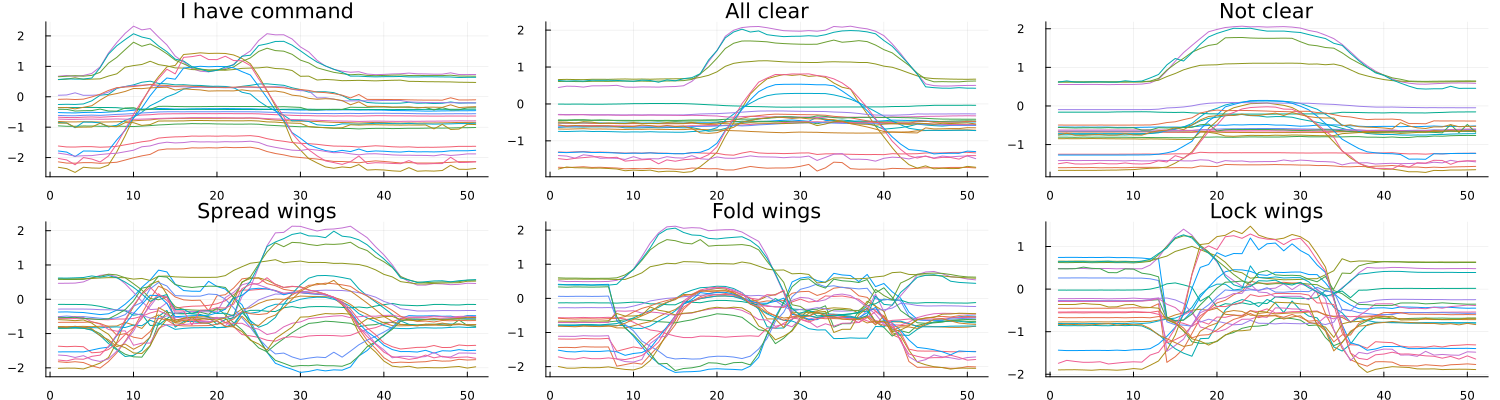

In [7]:
# Let's inspect an instance for each class.
plot(map(i->plot(collect(X_df[i,:]), labels=nothing,title=y[i]), 1:30:180)..., layout = (2, 3), size = (1500,400))

In [8]:
X = scalarlogiset(X_df)
println(X)

SupportedLogiset with 1 supports (343.08 MBs)
├ worldtype:                   SoleLogics.Interval{Int64}
├ featvaltype:                 Float64
├ featuretype:                 SoleModels.AbstractUnivariateFeature
├ frametype:                   SoleLogics.FullDimensionalFrame{1, SoleLogics.Interval{Int64}}
├ # instances:                 360
├ usesfullmemo:                true
├[BASE] UniformFullDimensionalLogiset of channel size (51,) (342.91 MBs)
│ ├ size × eltype:              (51, 51, 360, 48) × Float64
│ └ features:                   48 -> SoleModels.AbstractUnivariateFeature["max[V1]", "min[V1]", "max[V2]", "min[V2]", "...", "min[V22]", "max[V23]", "min[V23]", "max[V24]", "min[V24]"]
└[SUPPORT 1] FullMemoset (0 memoized values, 174.42 KBs))



In [9]:
# Accessibles on multirelation frames
# Get the structure ("frame") of the first instance. It is a "dimensional" frame, of all interval from 1 to 51.
fr = SoleLogics.frame(X, 1)

SoleLogics.FullDimensionalFrame{1, SoleLogics.Interval{Int64}}((51,))

In [10]:
# Enumerate all worlds
collect(allworlds(fr))

1326-element Vector{SoleLogics.Interval{Int64}}:
 SoleLogics.Interval{Int64}(1, 2)
 SoleLogics.Interval{Int64}(1, 3)
 SoleLogics.Interval{Int64}(2, 3)
 SoleLogics.Interval{Int64}(1, 4)
 SoleLogics.Interval{Int64}(2, 4)
 SoleLogics.Interval{Int64}(3, 4)
 SoleLogics.Interval{Int64}(1, 5)
 SoleLogics.Interval{Int64}(2, 5)
 SoleLogics.Interval{Int64}(3, 5)
 SoleLogics.Interval{Int64}(4, 5)
 SoleLogics.Interval{Int64}(1, 6)
 SoleLogics.Interval{Int64}(2, 6)
 SoleLogics.Interval{Int64}(3, 6)
 ⋮
 SoleLogics.Interval{Int64}(40, 52)
 SoleLogics.Interval{Int64}(41, 52)
 SoleLogics.Interval{Int64}(42, 52)
 SoleLogics.Interval{Int64}(43, 52)
 SoleLogics.Interval{Int64}(44, 52)
 SoleLogics.Interval{Int64}(45, 52)
 SoleLogics.Interval{Int64}(46, 52)
 SoleLogics.Interval{Int64}(47, 52)
 SoleLogics.Interval{Int64}(48, 52)
 SoleLogics.Interval{Int64}(49, 52)
 SoleLogics.Interval{Int64}(50, 52)
 SoleLogics.Interval{Int64}(51, 52)

In [11]:
using SoleLogics: Interval
# Enumerate the intervals that are "Later" than [1,10]
accessibles(fr, Interval(1,10), IA_L) |> collect

861-element Vector{Interval{Int64}}:
 Interval{Int64}(11, 12)
 Interval{Int64}(11, 13)
 Interval{Int64}(12, 13)
 Interval{Int64}(11, 14)
 Interval{Int64}(12, 14)
 Interval{Int64}(13, 14)
 Interval{Int64}(11, 15)
 Interval{Int64}(12, 15)
 Interval{Int64}(13, 15)
 Interval{Int64}(14, 15)
 Interval{Int64}(11, 16)
 Interval{Int64}(12, 16)
 Interval{Int64}(13, 16)
 ⋮
 Interval{Int64}(40, 52)
 Interval{Int64}(41, 52)
 Interval{Int64}(42, 52)
 Interval{Int64}(43, 52)
 Interval{Int64}(44, 52)
 Interval{Int64}(45, 52)
 Interval{Int64}(46, 52)
 Interval{Int64}(47, 52)
 Interval{Int64}(48, 52)
 Interval{Int64}(49, 52)
 Interval{Int64}(50, 52)
 Interval{Int64}(51, 52)

In [12]:
# Remember that features are computed on each world
# Let's compute the minimum of the first variable on an arbitrary interval, that is, "X[Hand tip l]".
feature = UnivariateMin(1)
Sole.featvalue(feature, X, 1, Interval(10,30))

-0.444535

In [13]:
# Remember that atoms are *scalar conditions on features*
# Let's check one on an interval of the first instance
p = Atom(ScalarCondition(feature, >, -0.5))
check(p, X, 1, Interval(10,30))

true

In [14]:
# I can check any formula
p = Atom(ScalarCondition(UnivariateMin(1), >, -0.5))
q = Atom(ScalarCondition(UnivariateMin(2), <=, 10))
φ = p ∨ q
check(φ, X, 1, Interval(10,30))

true

In [40]:
# Generate a random HS formula with scalar conditions on features, and check it on the dataset.
features = [UnivariateMin(i_variable) for i_variable in 1:ncol(X_df)]
alpha = [Atom(ScalarCondition(feat, >, thresh)) for feat in features for thresh in 0:0.1:1]

HS_connectives = SoleLogics.diamondsandboxes(SoleLogics.IARelations)
propo_connectives = SoleLogics.BASE_PROPOSITIONAL_CONNECTIVES

println("Propositional connectives: $(join(syntaxstring.(propo_connectives), ", "))")
println("HS connectives: $(join(syntaxstring.(HS_connectives), ", "))")

propo_weights = fill(1/length(propo_connectives), length(propo_connectives))
HS_weights = fill(1/length(HS_connectives), length(HS_connectives))

connectives = vcat(propo_connectives, HS_connectives)

opweights = vcat(propo_weights, HS_weights)
    
treeheight = 3
φ2 = randformula(Random.MersenneTwister(30), treeheight, alpha, connectives; opweights = opweights)
println()
println("Random formula:")
println(syntaxstring(φ2))
        
check(φ2, X, 1, Interval(10,30))

Propositional connectives: ¬, ∧, ∨, →
HS connectives: ⟨A⟩, [A], ⟨L⟩, [L], ⟨B⟩, [B], ⟨E⟩, [E], ⟨D⟩, [D], ⟨O⟩, [O], ⟨A̅⟩, [A̅], ⟨L̅⟩, [L̅], ⟨B̅⟩, [B̅], ⟨E̅⟩, [E̅], ⟨D̅⟩, [D̅], ⟨O̅⟩, [O̅]

Random formula:
¬((min[V8] > 0.3 → min[V13] > 0.2) → (min[V18] > 0.6 ∨ min[V16] > 0.2))


false

In [41]:
# Let's check a formula on all the instances
check_mask = check(φ2, X, Interval(10,30))

360-element Vector{Bool}:
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 ⋮
 0
 1
 0
 0
 0
 1
 0
 0
 0
 0
 0
 0

In [42]:
# It holds on part of the instances
sum(check_mask)

98

In [43]:
# Let's ask whether the formula holds *all* intervals, instead of checking it on [1,2]
println("Applying the universal global operator: ", SoleLogics.globalbox)
println()

universal_φ = globalbox(φ2)
println("Formula: ", syntaxstring(universal_φ))
check_mask = check(universal_φ, X)

# It holds on no instance... Too restrictive!
sum(check_mask)

Applying the universal global operator: [G]

Formula: [G]¬((min[V8] > 0.3 → min[V13] > 0.2) → (min[V18] > 0.6 ∨ min[V16] > 0.2))


0

In [44]:
# Let's ask whether there exists any interval where the formula holds
println("Applying the existential global operator: ", SoleLogics.globaldiamond)
println()

existential_φ = globaldiamond(φ2)
println("Formula: ", syntaxstring(existential_φ))
check_mask = check(existential_φ, X)

# It holds on more instances
sum(check_mask)

Applying the existential global operator: ⟨G⟩

Formula: ⟨G⟩¬((min[V8] > 0.3 → min[V13] > 0.2) → (min[V18] > 0.6 ∨ min[V16] > 0.2))


127

In [45]:
# Question: does it lead to a good rule?

println(syntaxstring(existential_φ))

println()
println(SoleLogics.experimentals.formula2natlang(existential_φ))

⟨G⟩¬((min[V8] > 0.3 → min[V13] > 0.2) → (min[V18] > 0.6 ∨ min[V16] > 0.2))

∃ interval where (¬(whenever whenever min[V8] > 0.3 holds, also min[V13] > 0.2 holds, also min[V18] > 0.6 ∨ min[V16] > 0.2))


In [46]:
neg_existential_φ = normalize(¬ existential_φ;
    profile = :readability,
    remove_implications = true,
    allow_atom_flipping = true
)

syntaxstring(neg_existential_φ; remove_redundant_parentheses = false)

"[G]((min[V16] > 0.2) ∨ ((min[V18] > 0.6) ∨ ((min[V8] > 0.3) ∧ (min[V13] ≤ 0.2))))"

In [47]:
(SoleLogics.precedence(∧), SoleLogics.precedence(∨))

(12, 11)

In [48]:
countmap(y)

Dict{CategoricalArrays.CategoricalValue{String, UInt32}, Int64} with 6 entries:
  "Spread wings"   => 60
  "I have command" => 60
  "Not clear"      => 60
  "Lock wings"     => 60
  "All clear"      => 60
  "Fold wings"     => 60

In [49]:
println(existential_φ)
countmap(y[check_mask])

SyntaxBranch{DiamondRelationalConnective{GlobalRel}}: ⟨G⟩¬((min[V8] > 0.3 → min[V13] > 0.2) → (min[V18] > 0.6 ∨ min[V16] > 0.2))


Dict{CategoricalArrays.CategoricalValue{String, UInt32}, Int64} with 5 entries:
  "Spread wings" => 58
  "Lock wings"   => 10
  "Not clear"    => 1
  "Fold wings"   => 57
  "All clear"    => 1

In [50]:
println(neg_existential_φ)
countmap(y[(!).(check_mask)])

SyntaxBranch{BoxRelationalConnective{GlobalRel}}: [G](min[V16] > 0.2 ∨ min[V18] > 0.6 ∨ min[V8] > 0.3 ∧ min[V13] ≤ 0.2)


Dict{CategoricalArrays.CategoricalValue{String, UInt32}, Int64} with 6 entries:
  "Spread wings"   => 2
  "I have command" => 60
  "Not clear"      => 59
  "Lock wings"     => 50
  "All clear"      => 59
  "Fold wings"     => 3

In [51]:
branch = Branch(neg_existential_φ, "I have command", "Spread wings")

▣ [G]((min[V16] > 0.2) ∨ (min[V18] > 0.6) ∨ (min[V8] > 0.3) ∧ (min[V13] ≤ 0.2))
├✔ I have command
└✘ Spread wings



In [52]:
y_preds = SoleModels.apply(branch, X)
println("Accuracy of this branch: $(sum(y .== y_preds)/length(y))")
println("Random chanc e: $(60/length(y))")

Accuracy of this branch: 0.3277777777777778
Random chanc e: 0.16666666666666666


In [53]:
# Some values during checking were memoized
println(X)

SupportedLogiset with 1 supports (417.29 MBs)
├ worldtype:                   Interval{Int64}
├ featvaltype:                 Float64
├ featuretype:                 SoleModels.AbstractUnivariateFeature
├ frametype:                   SoleLogics.FullDimensionalFrame{1, Interval{Int64}}
├ # instances:                 360
├ usesfullmemo:                true
├[BASE] UniformFullDimensionalLogiset of channel size (51,) (342.91 MBs)
│ ├ size × eltype:              (51, 51, 360, 48) × Float64
│ └ features:                   48 -> SoleModels.AbstractUnivariateFeature["max[V1]", "min[V1]", "max[V2]", "min[V2]", "...", "min[V22]", "max[V23]", "min[V23]", "max[V24]", "min[V24]"]
└[SUPPORT 1] FullMemoset (7923 memoized values, 74.38 MBs))



In [54]:
# Randomly split the data: 20% training, 80% testing
N = nrow(X_df)
perm = randperm(Random.MersenneTwister(1), N)
train_idxs, test_idxs = perm[1:round(Int, N*.2)], perm[round(Int, N*.2)+1:end];
println("Using $(length(train_idxs)) instances for training")
println("Using $(length(test_idxs)) instances for testing")

Using 72 instances for training
Using 288 instances for testing


In [55]:
using ModalDecisionTrees

# Bind a machine learning algorithm to logiset & labels
mach = machine(ModalDecisionTree(; relations = :IA7, features = [minimum]), X_df, y)

# Train!
@time fit!(mach; rows=train_idxs);

# Compute accuracy
yhat = predict_mode(mach; rows=test_idxs)
MLJ.accuracy(yhat, y[test_idxs])

[ Info: Precomputing logiset...
[ Info: Training machine(ModalDecisionTree(max_depth = nothing, …), …).


 35.403512 seconds (431.26 M allocations: 21.343 GiB, 18.47% gc time)


0.7847222222222222

In [56]:
# Show the restricted MDT learnt
printmodel(report(mach).rawmodel_full; hidemodality = true)

{1} SimpleDecision(⟨G⟩min[V1] ≥ 0.428173)                    All clear : 16/72 (conf = 0.2222)
✔ {1} SimpleDecision(⟨G⟩min[V13] < -1.536833)                Lock wings : 14/34 (conf = 0.4118)
│✔ {1} SimpleDecision(⟨A̅O̅⟩min[V1] ≥ 0.428173)                Fold wings : 12/20 (conf = 0.6000)
││✔ Spread wings : 8/8 (conf = 1.0000)
││✘ Fold wings : 12/12 (conf = 1.0000)
│✘ Lock wings : 14/14 (conf = 1.0000)
✘ {1} SimpleDecision(⟨G⟩min[V5] ≥ 0.847021)                  All clear : 16/38 (conf = 0.4211)
 ✔ {1} SimpleDecision(⟨=⟩min[V2] ≥ -1.668041)                I have command : 13/14 (conf = 0.9286)
 │✔ I have command : 3/4 (conf = 0.7500)
 │✘ I have command : 10/10 (conf = 1.0000)
 ✘ {1} SimpleDecision(⟨G⟩min[V3] ≥ -0.62357)                 All clear : 15/24 (conf = 0.6250)
  ✔ {1} SimpleDecision(⟨=⟩min[V5] < -1.850843)               Not clear : 8/11 (conf = 0.7273)
  │✔ All clear : 3/4 (conf = 0.7500)
  │✘ Not clear : 7/7 (conf = 1.0000)
  ✘ {1} SimpleDecision(⟨G⟩min[V1] ≥ -0.413014)       

In [57]:
# Show its *pure* version
printmodel(report(mach).solemodel_full; show_metrics = true, hidemodality = true)

▣ ⟨G⟩(min[V1] ≥ 0.428173)
├✔ ⟨G⟩((min[V1] ≥ 0.428173) ∧ ⟨G⟩(min[V13] < -1.536833))
│├✔ ⟨G⟩((min[V1] ≥ 0.428173) ∧ ⟨G⟩((min[V13] < -1.536833) ∧ ⟨A̅O̅⟩(min[V1] ≥ 0.428173)))
││├✔ Spread wings : (ninstances = 8, confidence = 1.0, coverage = 1.0)
││└✘ Fold wings : (ninstances = 12, confidence = 1.0, coverage = 1.0)
│└✘ Lock wings : (ninstances = 14, confidence = 1.0, coverage = 1.0)
└✘ ⟨G⟩(min[V5] ≥ 0.847021)
 ├✔ ⟨G⟩((min[V5] ≥ 0.847021) ∧ (min[V2] ≥ -1.668041))
 │├✔ I have command : (ninstances = 4, confidence = 0.75, coverage = 1.0)
 │└✘ I have command : (ninstances = 10, confidence = 1.0, coverage = 1.0)
 └✘ ⟨G⟩(min[V3] ≥ -0.62357)
  ├✔ ⟨G⟩((min[V3] ≥ -0.62357) ∧ (min[V5] < -1.850843))
  │├✔ All clear : (ninstances = 4, confidence = 0.75, coverage = 1.0)
  │└✘ Not clear : (ninstances = 7, confidence = 1.0, coverage = 1.0)
  └✘ ⟨G⟩(min[V1] ≥ -0.413014)
   ├✔ All clear : (ninstances = 4, confidence = 0.75, coverage = 1.0)
   └✘ All clear : (ninstances = 9, confidence = 1.0, coverage = 1.0

In [58]:
simplified_restricted_tree = ModalDecisionTrees.prune(report(mach).rawmodel_full; simplify = true)
printmodel(simplified_restricted_tree)

println()
println("# Leaves: ", nleaves(simplified_restricted_tree))

{1} SimpleDecision(⟨G⟩min[V1] ≥ 0.428173)                    All clear : 16/72 (conf = 0.2222)
✔ {1} SimpleDecision(⟨G⟩min[V13] < -1.536833)                Lock wings : 14/34 (conf = 0.4118)
│✔ {1} SimpleDecision(⟨A̅O̅⟩min[V1] ≥ 0.428173)                Fold wings : 12/20 (conf = 0.6000)
││✔ Spread wings : 8/8 (conf = 1.0000)
││✘ Fold wings : 12/12 (conf = 1.0000)
│✘ Lock wings : 14/14 (conf = 1.0000)
✘ {1} SimpleDecision(⟨G⟩min[V5] ≥ 0.847021)                  All clear : 16/38 (conf = 0.4211)
 ✔ I have command : 13/14 (conf = 0.9286)
 ✘ {1} SimpleDecision(⟨G⟩min[V3] ≥ -0.62357)                 All clear : 15/24 (conf = 0.6250)
  ✔ {1} SimpleDecision(⟨=⟩min[V5] < -1.850843)               Not clear : 8/11 (conf = 0.7273)
  │✔ All clear : 3/4 (conf = 0.7500)
  │✘ Not clear : 7/7 (conf = 1.0000)
  ✘ All clear : 12/13 (conf = 0.9231)

# Leaves: 7


In [59]:
solemodel = ModalDecisionTrees.translate(simplified_restricted_tree)

▣ {1}(⟨G⟩(min[V1] ≥ 0.428173))
├✔ {1}(⟨G⟩((min[V1] ≥ 0.428173) ∧ ⟨G⟩(min[V13] < -1.536833)))
│├✔ {1}(⟨G⟩((min[V1] ≥ 0.428173) ∧ ⟨G⟩((min[V13] < -1.536833) ∧ ⟨A̅O̅⟩(min[V1] ≥ 0.428173))))
││├✔ Spread wings
││└✘ Fold wings
│└✘ Lock wings
└✘ {1}(⟨G⟩(min[V5] ≥ 0.847021))
 ├✔ I have command
 └✘ {1}(⟨G⟩(min[V3] ≥ -0.62357))
  ├✔ {1}(⟨G⟩((min[V3] ≥ -0.62357) ∧ (min[V5] < -1.850843)))
  │├✔ All clear
  │└✘ Not clear
  └✘ All clear



In [60]:
# Print leaf rules + their training performances
ruleset = listrules(solemodel)
printmodel.(ruleset; show_metrics = true, threshold_digits = 2, variable_names_map = [names(X_df)],parenthesize_atoms = false, hidemodality = true);

▣ ⟨G⟩(min[X[Hand tip l]] ≥ 0.43 ∧ ⟨G⟩(min[X[Wrist l]] < -1.54 ∧ ⟨A̅O̅⟩min[X[Hand tip l]] ≥ 0.43))  🠮  Spread wings : (ninstances = 8, confidence = 1.0, coverage = 0.11)
▣ ⟨G⟩(min[X[Hand tip l]] ≥ 0.43 ∧ ⟨G⟩min[X[Wrist l]] < -1.54) ∧ [G](min[X[Hand tip l]] ≥ 0.43 → ([G](min[X[Wrist l]] < -1.54 → ([A̅O̅]min[X[Hand tip l]] < 0.43))))  🠮  Fold wings : (ninstances = 12, confidence = 1.0, coverage = 0.17)
▣ ⟨G⟩min[X[Hand tip l]] ≥ 0.43 ∧ [G](min[X[Hand tip l]] ≥ 0.43 → ([G]min[X[Wrist l]] ≥ -1.54))  🠮  Lock wings : (ninstances = 14, confidence = 1.0, coverage = 0.19)
▣ ⟨G⟩min[Y[Hand tip r]] ≥ 0.85 ∧ [G]min[X[Hand tip l]] < 0.43  🠮  I have command : (ninstances = 14, confidence = 0.93, coverage = 0.19)
▣ ⟨G⟩(min[Z[Hand tip l]] ≥ -0.62 ∧ min[Y[Hand tip r]] < -1.85) ∧ [G]min[X[Hand tip l]] < 0.43 ∧ [G]min[Y[Hand tip r]] < 0.85  🠮  All clear : (ninstances = 4, confidence = 0.75, coverage = 0.06)
▣ ⟨G⟩min[Z[Hand tip l]] ≥ -0.62 ∧ [G]min[X[Hand tip l]] < 0.43 ∧ [G]min[Y[Hand tip r]] < 0.85 ∧ [G](m

In [1]:
# Use abbrevations for feature-test operator pairs
printmodel.(ruleset; use_feature_abbreviations = true, show_metrics = true, threshold_digits = 2, variable_names_map = [names(X_df)],parenthesize_atoms = false, hidemodality = true);

LoadError: UndefVarError: `listrules` not defined

In [61]:
last_rule = ruleset[end]
last_antd = antecedent(last_rule)

println("First formula, translated:")
println(SoleLogics.experimentals.formula2natlang(last_antd; threshold_digits = 2, use_feature_abbreviations = true))
    

for (i_rule, rule) in enumerate(ruleset)
    println()
    println("[$i_rule]")
    antd = antecedent(rule)
    println(SoleLogics.experimentals.formula2natlang(antd; threshold_digits = 2, use_feature_abbreviations = true), "\n");
end

First formula, translated:
((∀ intervals (V1 ⪶ 0.43)) and (∀ intervals (V5 ⪶ 0.85))) and (∀ intervals (V3 ⪶ -0.62))

[1]
∃ interval where ((V1 ⪴ 0.43) and (∃ interval where ((V13 ⪶ -1.54) and (∃ preceding, partially overlapping interval where (V1 ⪴ 0.43)))))


[2]
(∃ interval where ((V1 ⪴ 0.43) and (∃ interval where (V13 ⪶ -1.54)))) and (∀ intervals (whenever V1 ⪴ 0.43 holds, also ∀ intervals (whenever V13 ⪶ -1.54 holds, also ∀ preceding, partially overlapping intervals (V1 ⪶ 0.43))))


[3]
(∃ interval where (V1 ⪴ 0.43)) and (∀ intervals (whenever V1 ⪴ 0.43 holds, also ∀ intervals (V13 ⪴ -1.54)))


[4]
(∃ interval where (V5 ⪴ 0.85)) and (∀ intervals (V1 ⪶ 0.43))


[5]
((∃ interval where ((V3 ⪴ -0.62) and (V5 ⪶ -1.85))) and (∀ intervals (V1 ⪶ 0.43))) and (∀ intervals (V5 ⪶ 0.85))


[6]
(((∃ interval where (V3 ⪴ -0.62)) and (∀ intervals (V1 ⪶ 0.43))) and (∀ intervals (V5 ⪶ 0.85))) and (∀ intervals (whenever V3 ⪴ -0.62 holds, also V5 ⪴ -1.85))


[7]
((∀ intervals (V1 ⪶ 0.43)) and (∀ inter

# Exercise

Rule 4 and 5 talk about properties holding on either *any* or *all* intervals.
There is probably a shorter way of phrasing such formulas (which, remember, are aliases for `⟨G⟩(min[*] >= *)`, `[G](min[*] < *)`, etc.)

Improve the recursive function `formula2natlang` so that rules 4 and 5 are translated into a simpler natural language sentence. This can be done by adding methods for the function covering specific cases.
The function is defined in the module module `SoleLogics.experimentals` and is extended in `SoleModels.experimentals`
and, since `ScalarCondition`s do not exist at the purely logical level, such an extension should be done in `SoleModels.experimentals`.

Feel free to submit your solution by opening a pull request! 😃

In [62]:
# Print rules + their *test* performances

# Sprinkle the model with the test instances!
predictions, tree_test = report(mach).sprinkle(X_df[test_idxs,:], y[test_idxs]; simplify = true);

# Extract ruleset and print its metrics
ruleset_test = listrules(tree_test);

# printmodel.(ruleset_test; show_metrics = true, threshold_digits = 2, variable_names_map = [names(X_df)], parenthesize_atoms = true, hidemodality = true);
printmodel.(ruleset_test; show_metrics = true, threshold_digits = 2, parenthesize_atoms = false, hidemodality = true);

Applying tree... 100%|███████████████████████████████████| Time: 0:00:02


▣ ⟨G⟩(min[V1] ≥ 0.43 ∧ ⟨G⟩(min[V13] < -1.54 ∧ ⟨A̅O̅⟩min[V1] ≥ 0.43))  🠮  Spread wings : (ninstances = 8, confidence = 1.0, coverage = 0.11)
▣ ⟨G⟩(min[V1] ≥ 0.43 ∧ ⟨G⟩min[V13] < -1.54) ∧ [G](min[V1] ≥ 0.43 → ([G](min[V13] < -1.54 → ([A̅O̅]min[V1] < 0.43))))  🠮  Fold wings : (ninstances = 12, confidence = 1.0, coverage = 0.17)
▣ ⟨G⟩min[V1] ≥ 0.43 ∧ [G](min[V1] ≥ 0.43 → ([G]min[V13] ≥ -1.54))  🠮  Lock wings : (ninstances = 14, confidence = 1.0, coverage = 0.19)
▣ ⟨G⟩min[V5] ≥ 0.85 ∧ [G]min[V1] < 0.43  🠮  I have command : (ninstances = 14, confidence = 0.93, coverage = 0.19)
▣ ⟨G⟩(min[V3] ≥ -0.62 ∧ min[V5] < -1.85) ∧ [G]min[V1] < 0.43 ∧ [G]min[V5] < 0.85  🠮  All clear : (ninstances = 4, confidence = 0.75, coverage = 0.06)
▣ ⟨G⟩min[V3] ≥ -0.62 ∧ [G]min[V1] < 0.43 ∧ [G]min[V5] < 0.85 ∧ [G](min[V3] ≥ -0.62 → min[V5] ≥ -1.85)  🠮  Not clear : (ninstances = 7, confidence = 1.0, coverage = 0.1)
▣ [G]min[V1] < 0.43 ∧ [G]min[V5] < 0.85 ∧ [G]min[V3] < -0.62  🠮  All clear : (ninstances = 13, confiden

In [63]:
println("IF\n\t", SoleLogics.experimentals.formula2natlang(antecedent(ruleset_test[4])))
println("THEN\n\t", consequent(ruleset_test[4]))

IF
	(∃ interval where (min[V5] ≥ 0.847021)) and (∀ intervals (min[V1] < 0.428173))
THEN
	▣ I have command



In [64]:
# Obtain class rules & show their *test* metrics
condensed_ruleset_test = joinrules(ruleset_test)
printmodel.(condensed_ruleset_test; show_metrics = true, threshold_digits = 2, parenthesize_atoms = false, hidemodality = true);

▣ (⟨G⟩(min[V1] ≥ 0.43 ∧ ⟨G⟩(min[V13] < -1.54 ∧ ⟨A̅O̅⟩min[V1] ≥ 0.43)))  🠮  Spread wings : (ninstances = 8, confidence = 1.0, coverage = 0.11)
▣ (⟨G⟩(min[V1] ≥ 0.43 ∧ ⟨G⟩min[V13] < -1.54) ∧ [G](min[V1] ≥ 0.43 → ([G](min[V13] < -1.54 → ([A̅O̅]min[V1] < 0.43)))))  🠮  Fold wings : (ninstances = 12, confidence = 1.0, coverage = 0.17)
▣ (⟨G⟩min[V1] ≥ 0.43 ∧ [G](min[V1] ≥ 0.43 → ([G]min[V13] ≥ -1.54)))  🠮  Lock wings : (ninstances = 14, confidence = 1.0, coverage = 0.19)
▣ (⟨G⟩min[V5] ≥ 0.85 ∧ [G]min[V1] < 0.43)  🠮  I have command : (ninstances = 14, confidence = 0.93, coverage = 0.19)
▣ (⟨G⟩(min[V3] ≥ -0.62 ∧ min[V5] < -1.85) ∧ [G]min[V1] < 0.43 ∧ [G]min[V5] < 0.85) ∨ ([G]min[V1] < 0.43 ∧ [G]min[V5] < 0.85 ∧ [G]min[V3] < -0.62)  🠮  All clear : (ninstances = 17, confidence = 0.88, coverage = 0.12)
▣ (⟨G⟩min[V3] ≥ -0.62 ∧ [G]min[V1] < 0.43 ∧ [G]min[V5] < 0.85 ∧ [G](min[V3] ≥ -0.62 → min[V5] ≥ -1.85))  🠮  Not clear : (ninstances = 7, confidence = 1.0, coverage = 0.1)


# Exercise

`ModalDecisionTrees.jl` can also handle images! In which case, they use a 2D logic of rectangles instead of a 1D logic of intervals.

Apply ModalDecisionTrees to [Indian Pines](https://www.ehu.eus/ccwintco/index.php/Hyperspectral_Remote_Sensing_Scenes#Indian_Pines), a benchmark dataset for Land Cover Classification with 16 classes. The dataset consists of a hyperspectral image (i.e., 200 color channels instead of the typical 3 RGB channels) where many pixels have been labelled as belonging to one of the classes.

Sketch of the idea:
- Load the image and the ground truths. The package [MAT.jl](https://github.com/JuliaIO/MAT.jl/) can be helpful;
- From the $145 \times 145$ image provided, sample a (small) number $m$ of $3 \times 3$ patches for each class, and label each patch with the class label for the central pixel;
- Gather the ground truths into a vector of strings `y`, and the samples into a Julia `DataFrame` `X` with 200 columns, $16m$ rows and $3 \times 3$ *matrices* in the cells;
- Use MLJ to train a ModalDecisionTree on `X` and `y`, similarly to the above case.

Suggestion: since the formulas are desirably rotation-invariant, ask the algorithm to use *topological* relations instead of *directional* relations. Rrefer to the [doc](https://aclai-lab.github.io/ModalDecisionTrees.jl/) to know more.

<!-- Useful reference: Interpretable Land Cover Classification with Modal Decision Trees. European Journal of Remote Sensing. G. Pagliarini, G. Sciavicco. (in press) -->